In [266]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 10)

In [288]:
# Loading in data
fh = '/Users/henrycosentino/Desktop/Python/Projects/CPI Reaction Analysis/Monthly CPI Analysis.xlsx'
df = pd.read_excel(fh, sheet_name='Release Values')
df

,Actual Release Date,CPI Survey Delta (% chg),CPI Survey Delta (index),10YR bps Delta,2YR bps Delta,10YR CPI Swaps bps Delta,2YR CPI Swaps bps Delta
0,01/14/2000,0.0,-0.062470,4.90,3.60,NaN,NaN
1,02/18/2000,-0.1,-0.003791,-7.80,-3.40,NaN,NaN
2,03/17/2000,0.1,0.013467,-5.10,0.00,NaN,NaN
3,04/14/2000,0.2,0.088235,-5.60,-11.30,NaN,NaN
4,05/16/2000,-0.1,-0.158480,-2.20,2.70,NaN,NaN
...,...,...,...,...,...,...,...
296,09/11/2024,0.0,-0.012779,1.11,4.74,1.20,6.01
297,10/10/2024,0.1,0.079867,-1.18,-6.42,3.12,8.45
298,11/13/2024,0.0,0.044053,2.37,-5.44,-0.10,0.63
299,12/11/2024,0.0,0.012882,4.48,1.02,1.83,4.13


In [287]:
# Creating rates and swaps frames
rates_cols = ['Actual Release Date', 'CPI Survey Delta (% chg)',
              'CPI Survey Delta (index)', '10YR bps Delta',
              '2YR bps Delta']
swaps_cols = ['Actual Release Date', 'CPI Survey Delta (% chg)',
              'CPI Survey Delta (index)', '10YR CPI Swaps bps Delta',
              '2YR CPI Swaps bps Delta']

rates_frame = df[rates_cols]
swaps_frame = df[swaps_cols].dropna()

## Creating methods for quicker data analysis

In [286]:
# Standardization method
from sklearn.preprocessing import StandardScaler

def standardize(frame, col_list):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(frame[col_list])
    return pd.DataFrame(scaled_data, columns=frame[col_list].columns)

# Plotting method
def scatter_plot(frame, x, y, lower, upper):
    # Extract data from the frame
    x_data = frame[x]
    y_data = frame[y]

    # Filtering the data by the given range
    filtered_frame = frame[(x_data >= lower) & (x_data <= upper)]
    x_filtered = filtered_frame[x]
    y_filtered = filtered_frame[y]

    # Plotting the data
    slope, intercept = np.polyfit(x_filtered, y_filtered, 1)
    line = slope * x_filtered + intercept

    plt.scatter(x_filtered, y_filtered, color='blue', alpha=0.7, label='Data Points')
    plt.plot(x_filtered, line, color='red', label=f'Fit Line (r={np.corrcoef(x_filtered, y_filtered)[0, 1]:.2f})')

    plt.title(f"{x} vs {y} [{lower}, {upper}]")
    plt.xlabel(x)
    plt.ylabel(y)
    plt.legend()
    plt.show()

In [272]:
# Standardizing the data
rates_cols_to_strd = ['CPI Survey Delta (% chg)', 'CPI Survey Delta (index)',
                      '10YR bps Delta', '2YR bps Delta']
swaps_cols_to_strd = ['CPI Survey Delta (% chg)', 'CPI Survey Delta (index)', 
                      '10YR CPI Swaps bps Delta', '2YR CPI Swaps bps Delta']
rates_st_df = standardize(rates_frame, rates_cols_to_strd)
swaps_st_df = standardize(swaps_frame, swaps_cols_to_strd)

## CPI vs Rates Analysis

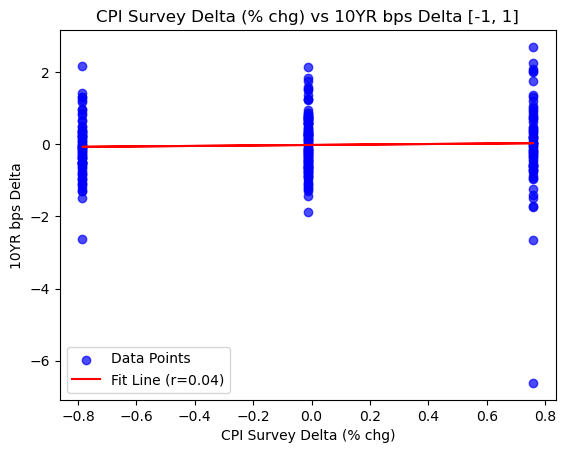

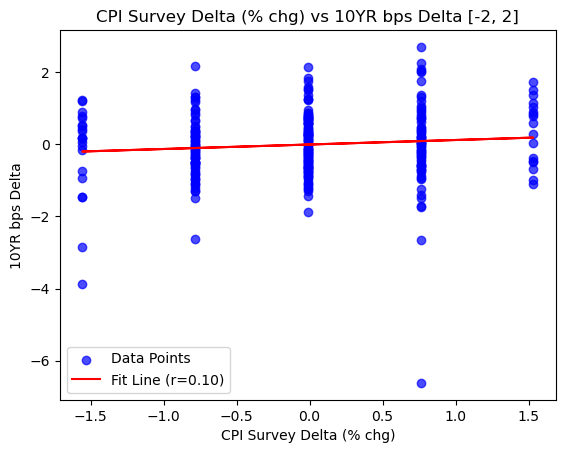

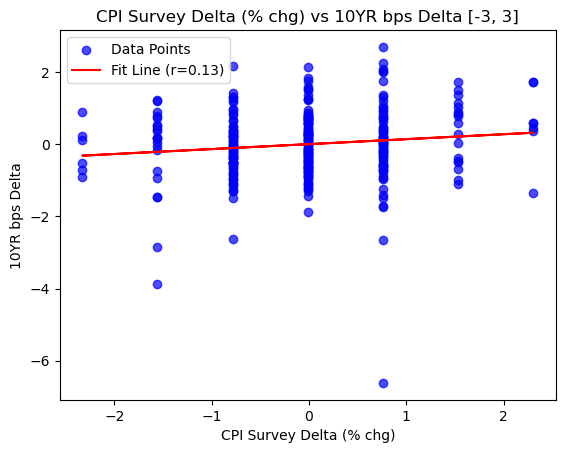

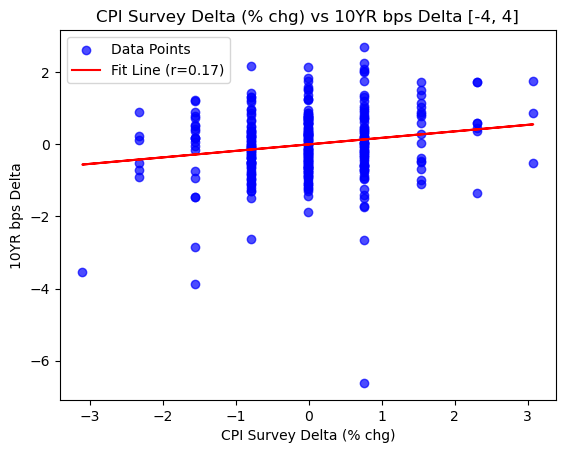

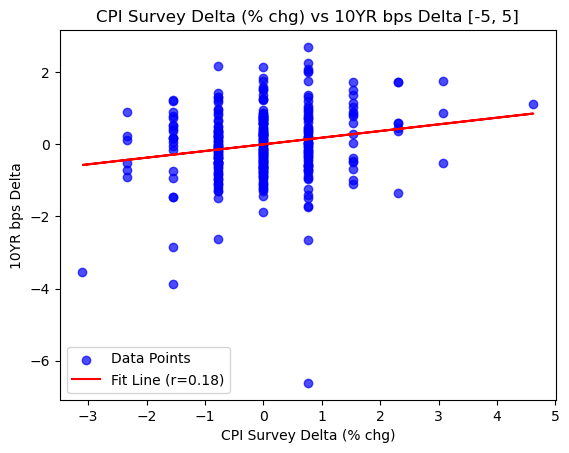

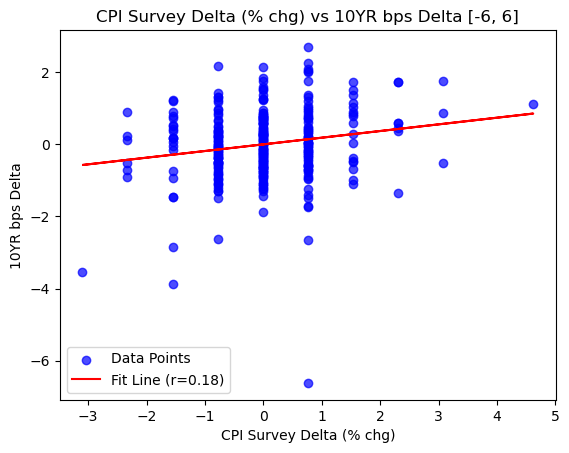

In [273]:
# Analyzing CPI survey delta (% chg) vs 10Y rates data

for x in range(1,7,1):
    scatter_plot(rates_st_df, 'CPI Survey Delta (% chg)', '10YR bps Delta', -x, x)

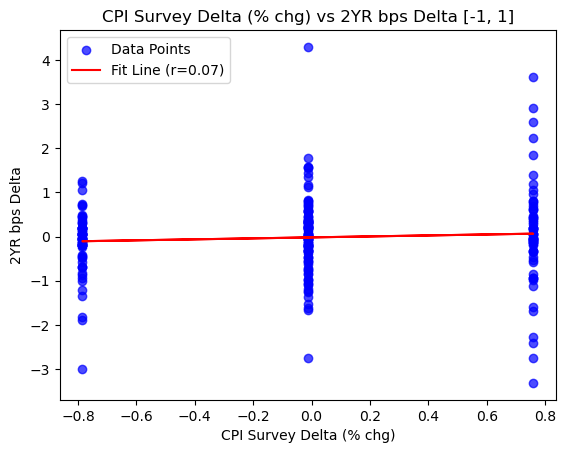

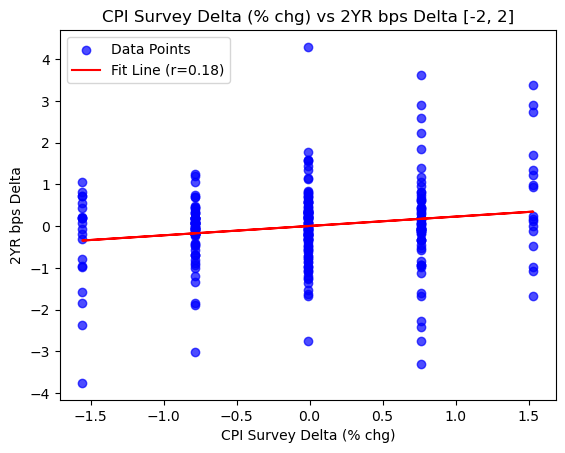

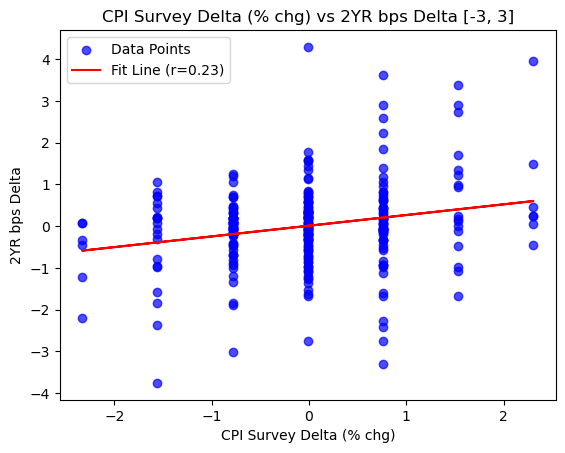

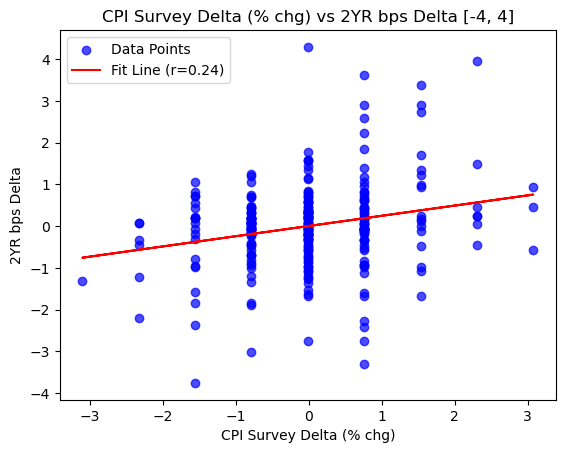

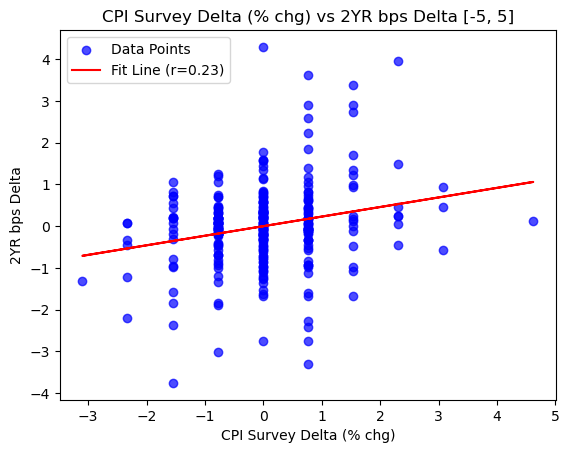

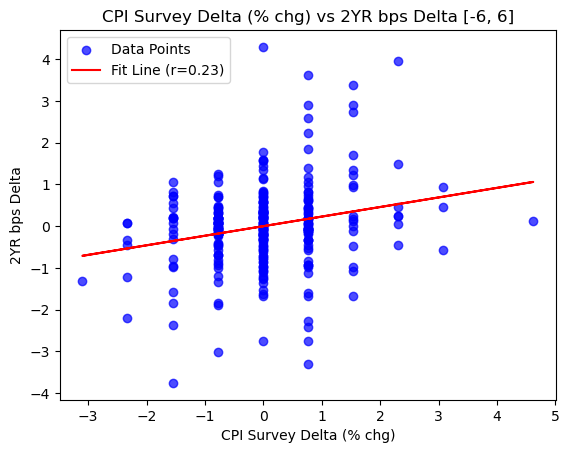

In [274]:
# Analyzing CPI survey delta (% chg) vs 2Y rates data

for x in range(1,7,1):
    scatter_plot(rates_st_df, 'CPI Survey Delta (% chg)', '2YR bps Delta', -x, x)

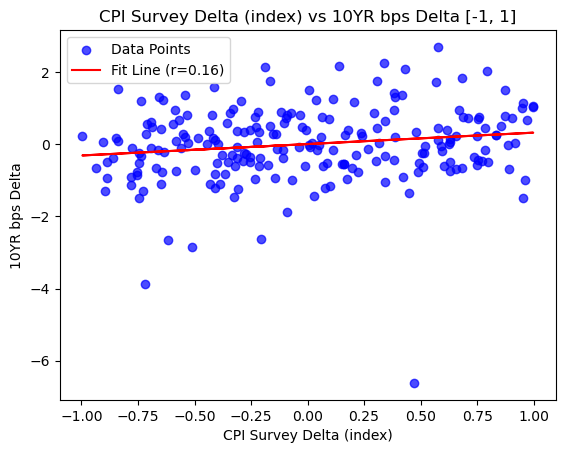

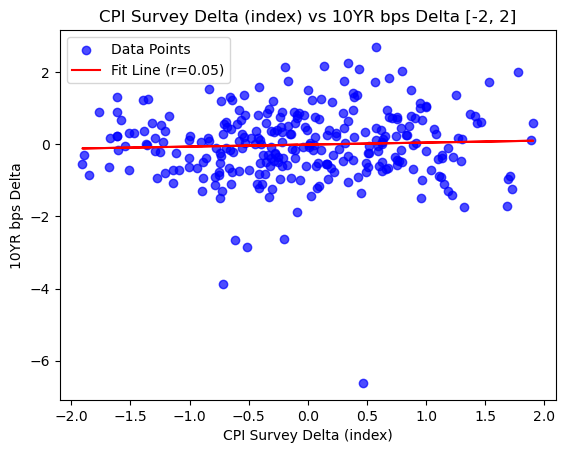

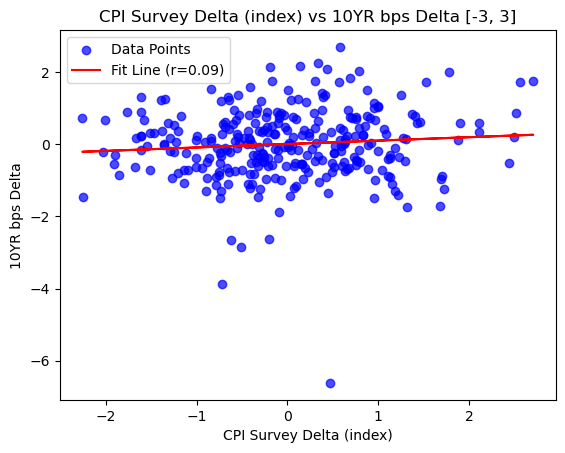

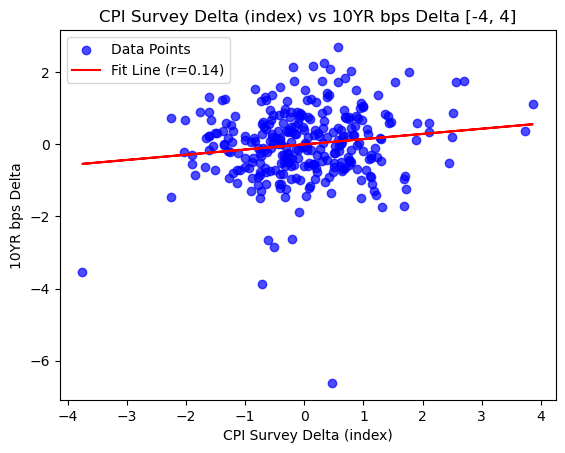

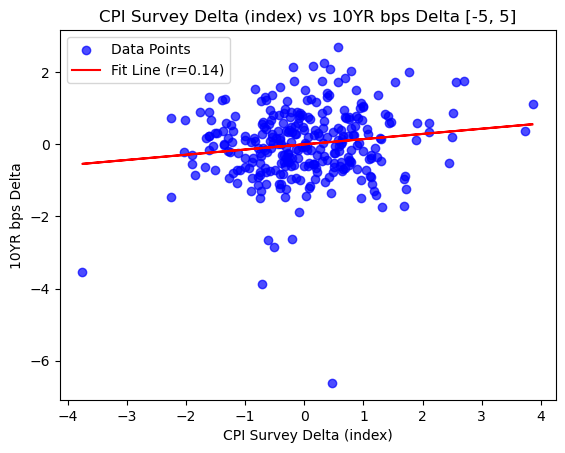

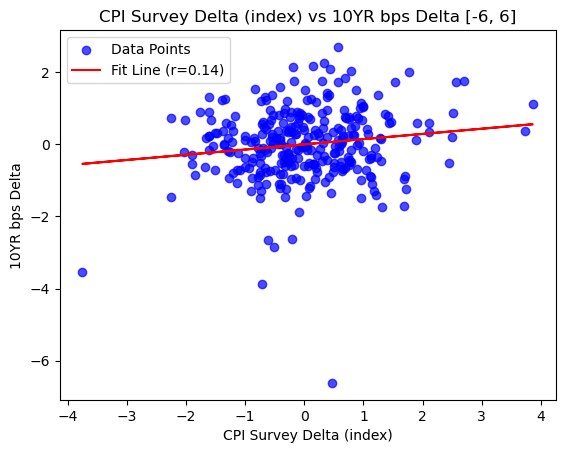

In [275]:
# Analyzing CPI Survey Delta (index) vs 10Y rates data

for x in range(1,7,1):
    scatter_plot(rates_st_df, 'CPI Survey Delta (index)', '10YR bps Delta', -x, x)

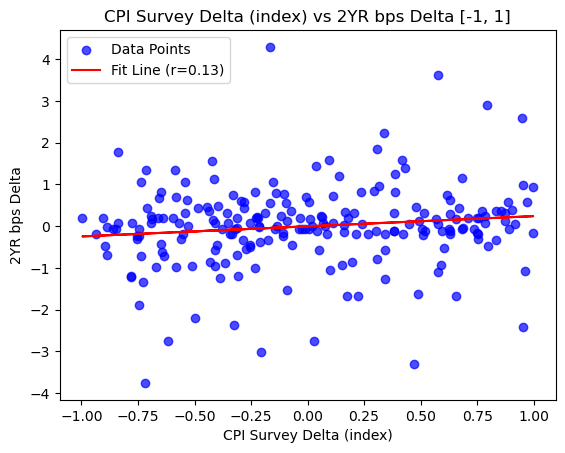

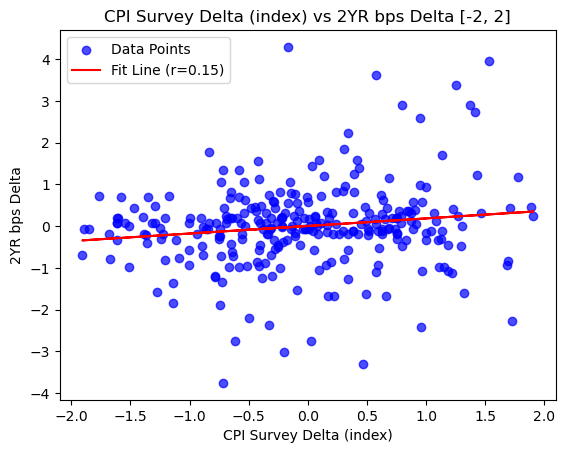

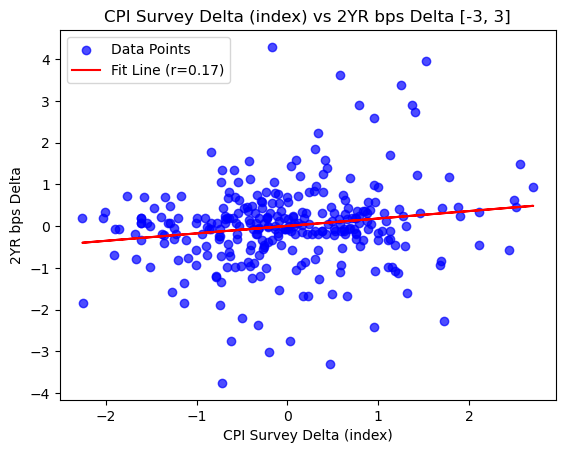

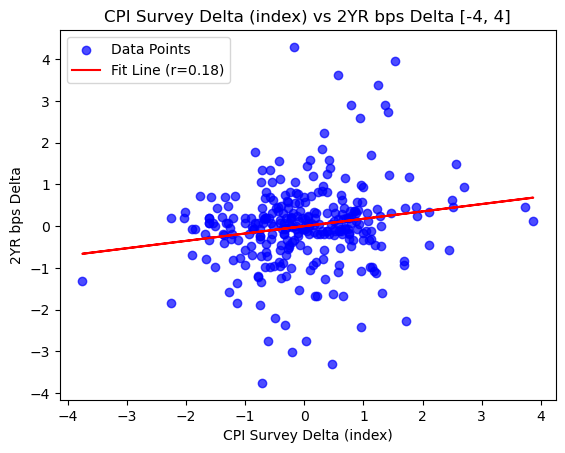

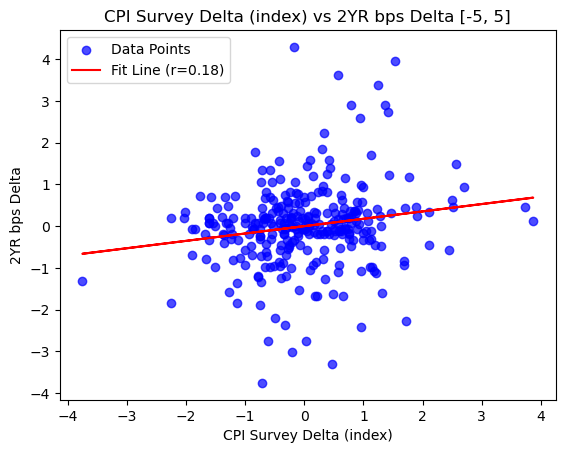

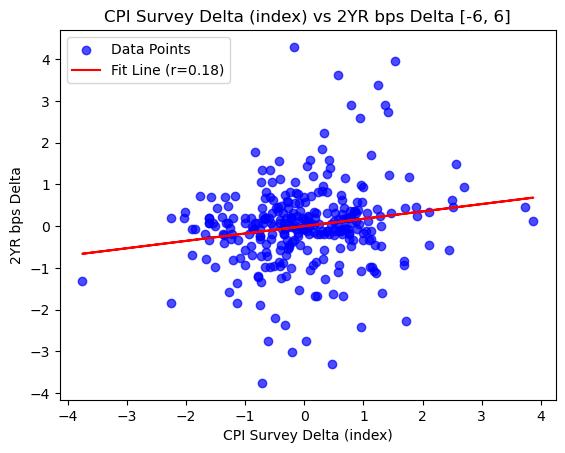

In [276]:
# Analyzing CPI Survey Delta (index) vs 2Y rates data

for x in range(1,7,1):
    scatter_plot(rates_st_df, 'CPI Survey Delta (index)', '2YR bps Delta', -x, x)

## CPI vs Swaps Analysis

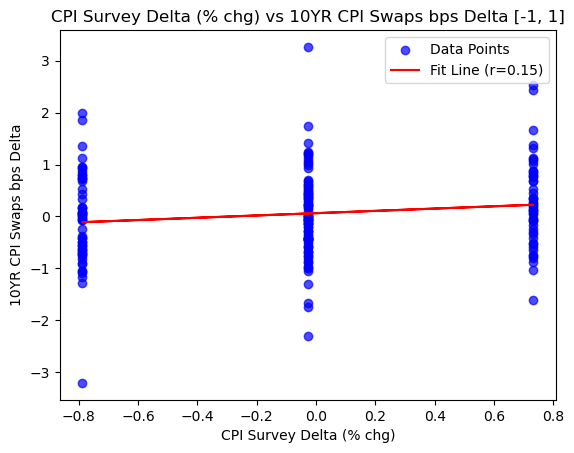

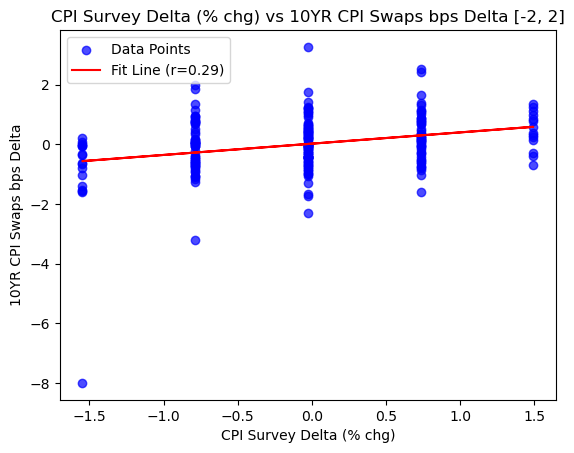

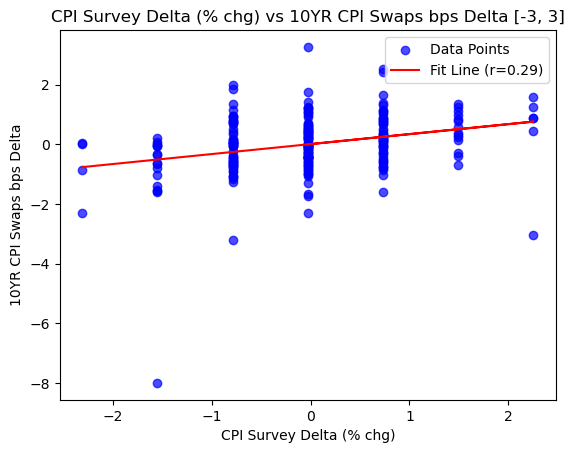

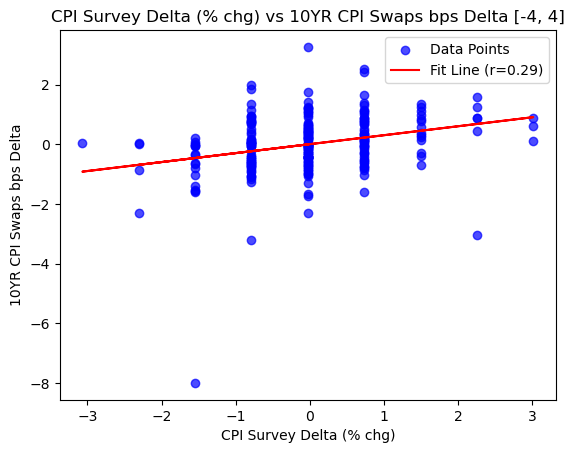

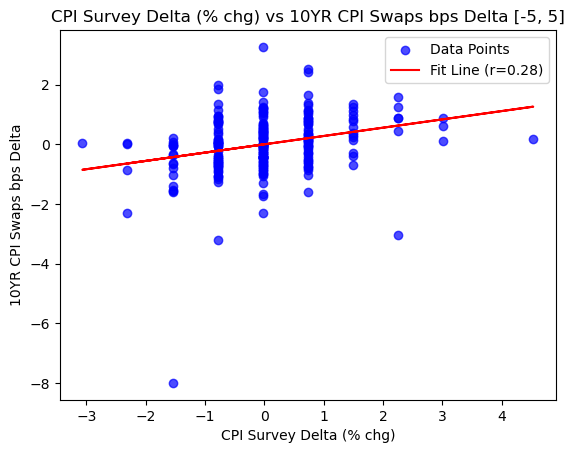

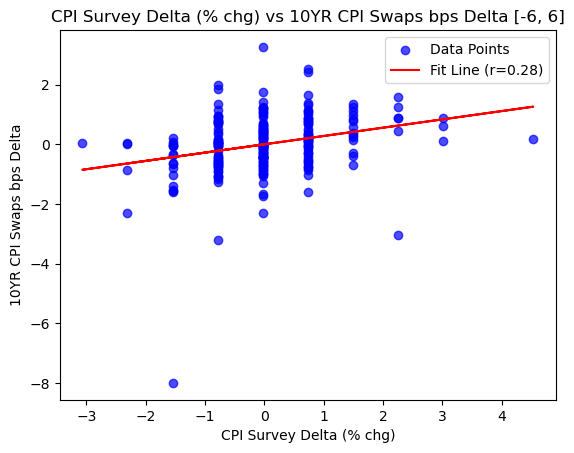

In [285]:
# Analyzing CPI Survey Delta (% chg) vs 10Y rates data

for x in range(1,7,1):
    scatter_plot(swaps_st_df, 'CPI Survey Delta (% chg)', '10YR CPI Swaps bps Delta', -x, x)

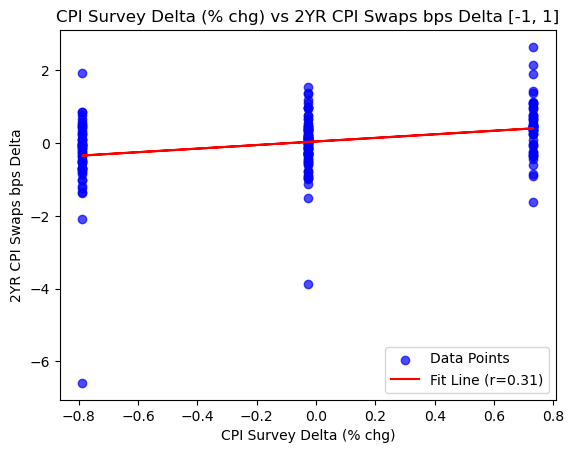

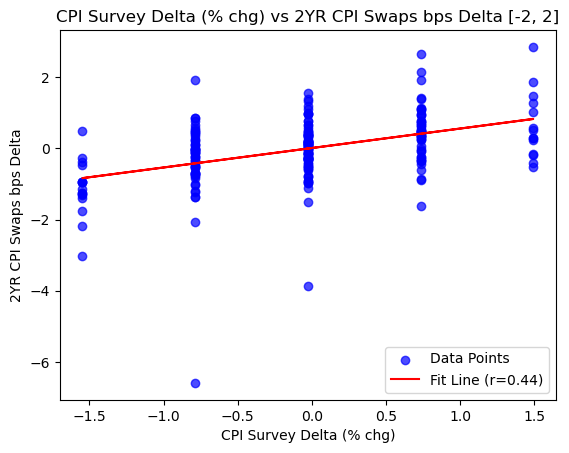

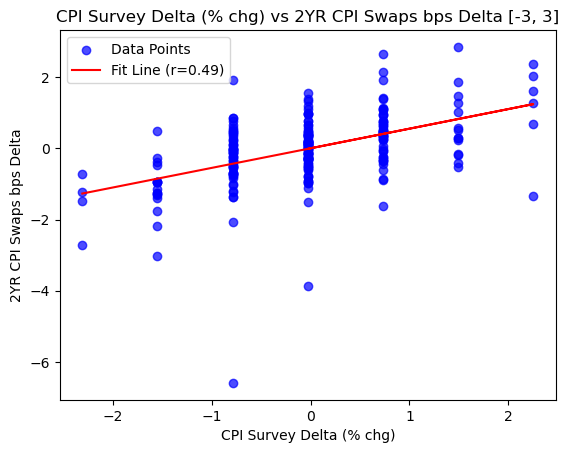

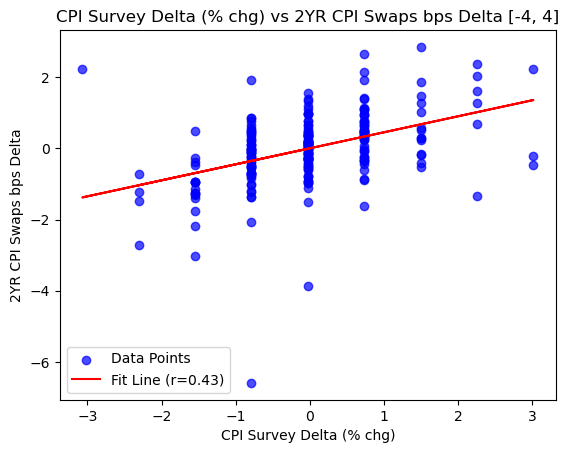

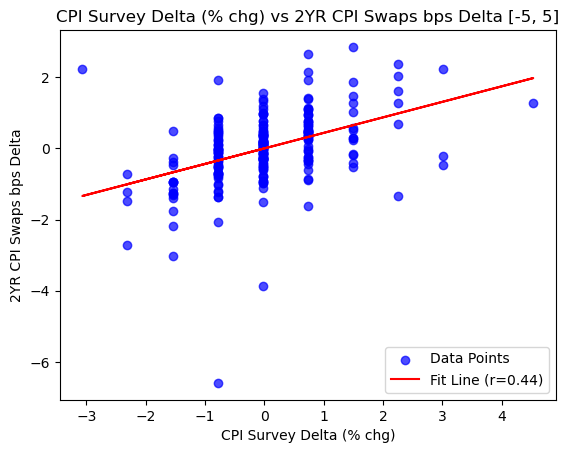

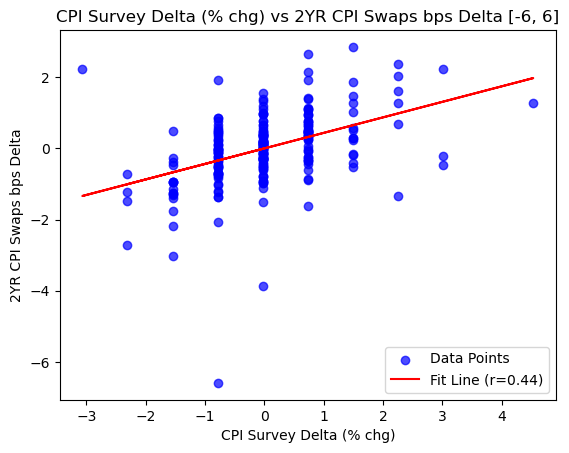

In [279]:
# Analyzing CPI Survey Delta (% chg) vs 2Y rates data

for x in range(1,7,1):
    scatter_plot(swaps_st_df, 'CPI Survey Delta (% chg)', '2YR CPI Swaps bps Delta', -x, x)

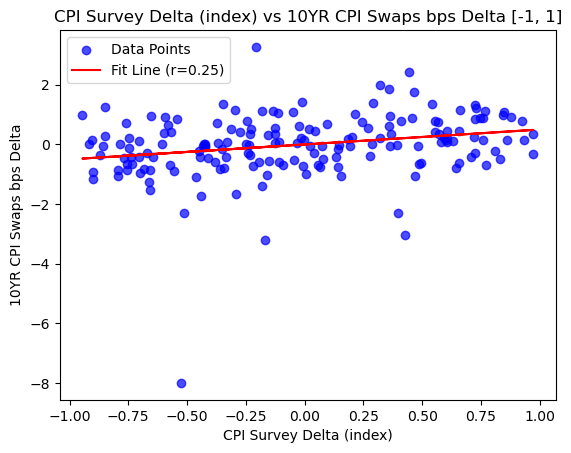

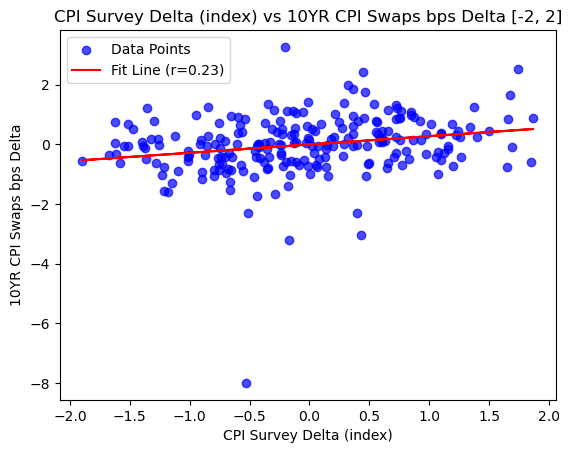

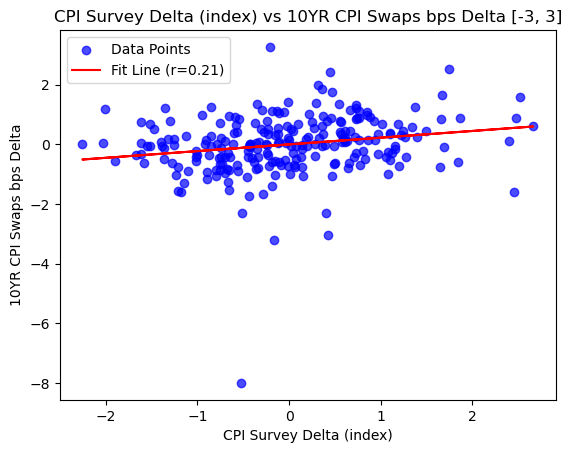

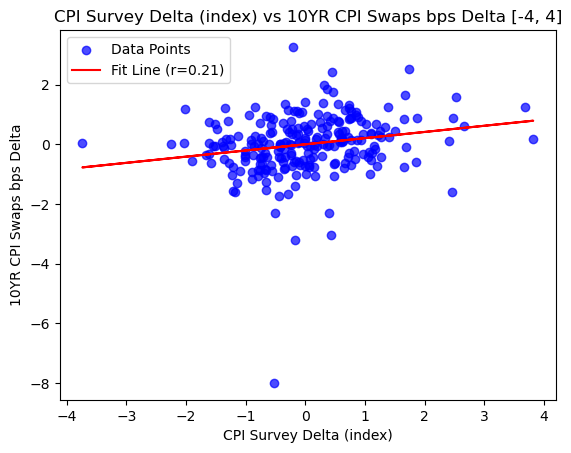

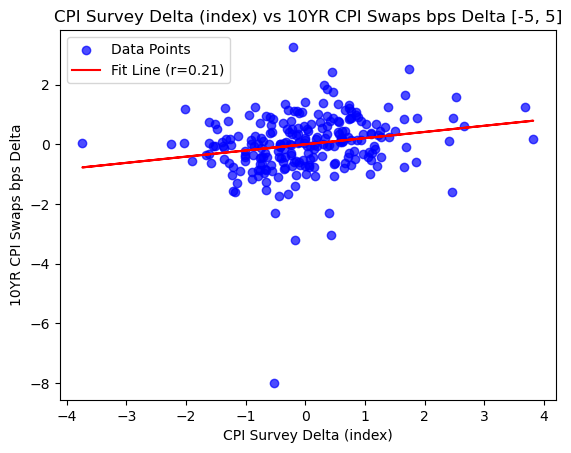

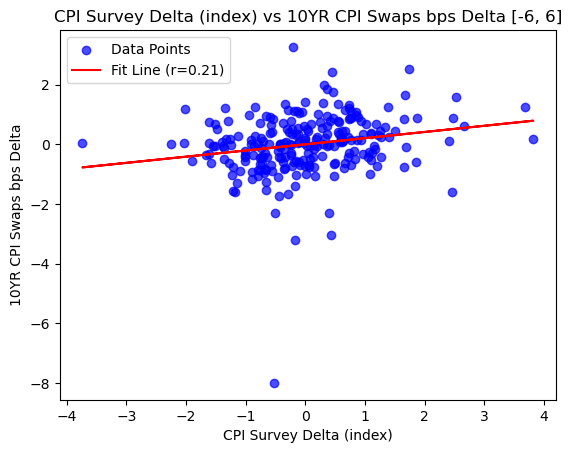

In [280]:
# Analyzing CPI Survey Delta (index) vs 10Y rates data

for x in range(1,7,1):
    scatter_plot(swaps_st_df, 'CPI Survey Delta (index)', '10YR CPI Swaps bps Delta', -x, x)

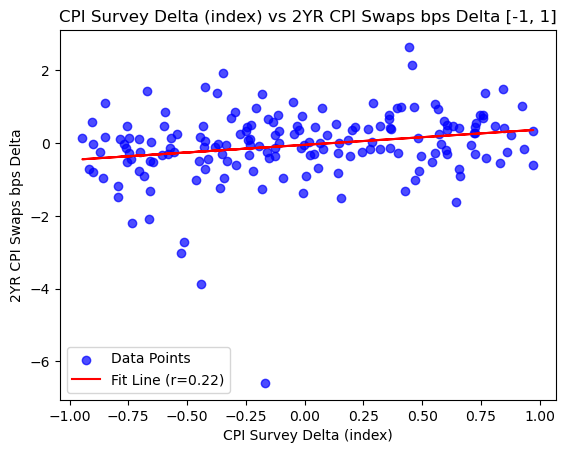

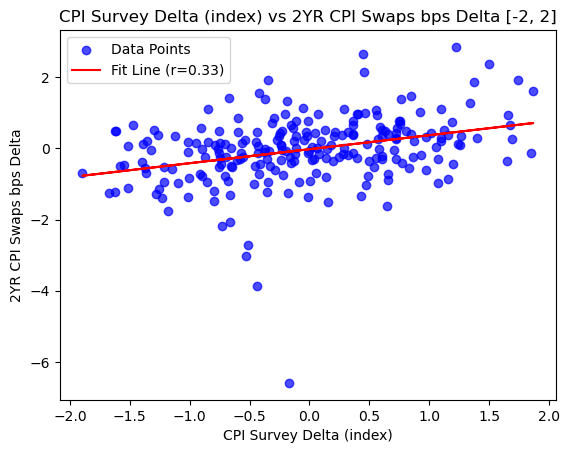

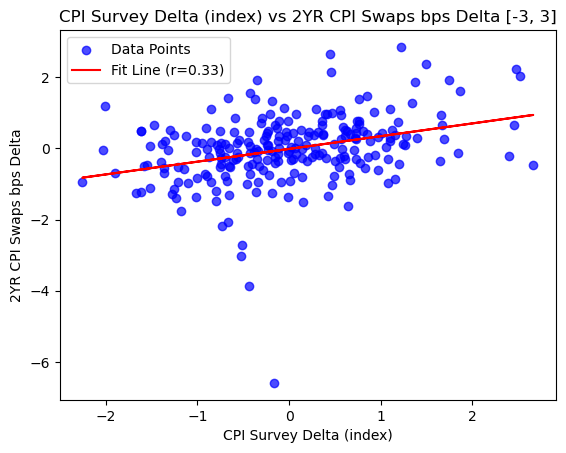

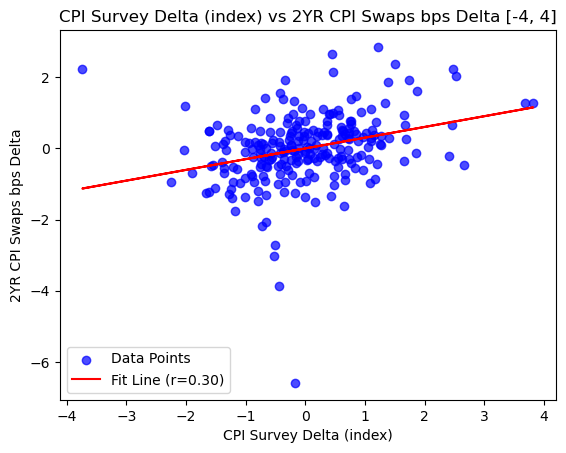

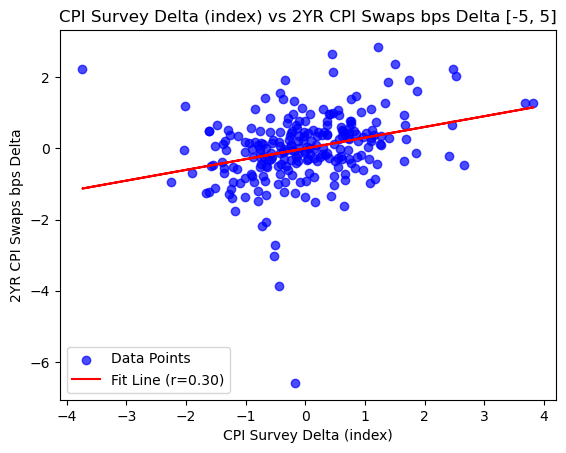

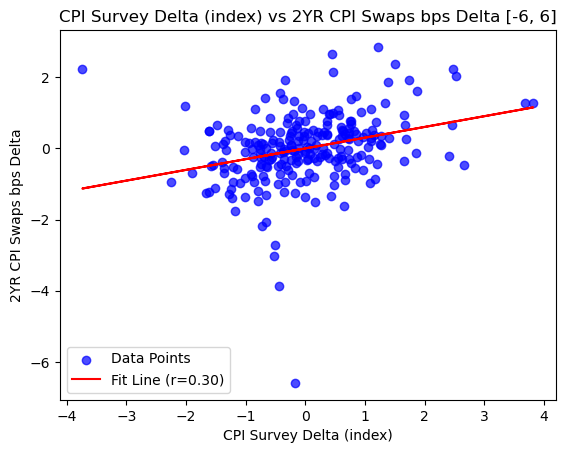

In [281]:
# Analyzing CPI Survey Delta (index) vs 2Y rates data

for x in range(1,7,1):
    scatter_plot(swaps_st_df, 'CPI Survey Delta (index)', '2YR CPI Swaps bps Delta', -x, x)